# Распознование объектов

Устанавливаем необходимые библиотеки

In [1]:
%pip install Cython
%pip install numpy matplotlib scipy scikit-image opencv-python


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from lib import *
import matplotlib.pyplot as plt
import cv2
import os

Изображения располагаются в трех директориях, иногда удобно пользоваться уже их определенными именами

In [3]:

no_dir = "datasets/no"
yes_dir = "datasets/yes"

In [4]:
path = 'datasets/no/10.jpg'
check_image(path)

False

Но такой подход малоинформативен для демонстрации работы алгоритма. Поэтому рассмотрим работу программы по шагам.

## Определение объектов

Первым шагом бинаризируем изображение с помощью детектора Кэнни и морфологических операций.

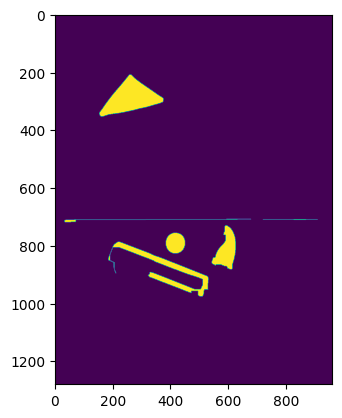

In [5]:
image = read_image(path)
bin_image = preprocess_image(image)
plt.imshow(bin_image)

Выделяем контуры прямоугольника и объектов. Выделенные контуры проходят через специфические проверки, сделанные конкретно под датасет.

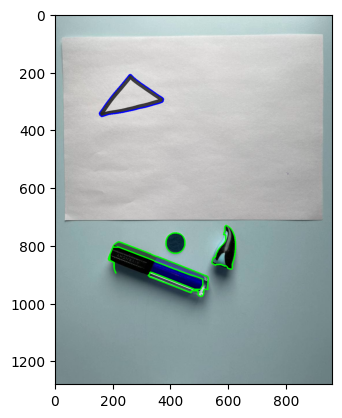

In [6]:
polygon, objects = find_contours(bin_image)
cv2.drawContours(image, polygon, -1, (0, 0, 255), thickness=4)
cv2.drawContours(image, objects, -1, (0, 255, 0), thickness=4)
plt.imshow(image)

Выделим объекты прямоугольниками, чтобы потом манипулировать именно с ними, как с наиболее простыми фигурами. У многоугольника определим его углы.

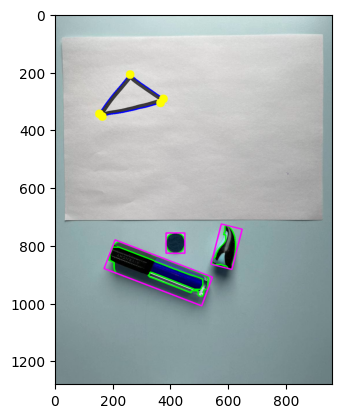

In [7]:
rectangles = find_min_rect(objects)
polygon_angles = find_approx_polygon(polygon)
cv2.drawContours(image, rectangles, -1, (255, 0, 255), 4)
cv2.drawContours(image, polygon_angles, -1, (255, 255, 0), thickness=30)
plt.imshow(image)

## Помещается ли объекты в прямоугольник?

In [8]:
is_objects_placed(polygon, objects)

False

В данном случае программа отработала правильно.

## Проверка всего датасета



In [12]:
for dirpath, dirnames, filenames in os.walk(no_dir):
    for filename in filenames:
        try:
            print(f"{filename} - {check_image(os.path.join(dirpath,filename))}")
        except:
            pass

8.jpg - False
9.jpg - False
14.jpg - False
15.jpg - False
13.jpg - False
11.jpg - False
10.jpg - False
no_5.jpg - False
no_4.jpg - True
no_1.jpg - False
no_3.jpg - False
no_2.jpg - False
7.jpg - False
6.jpg - False


In [13]:
for dirpath, dirnames, filenames in os.walk(yes_dir):
    for filename in filenames:
        try:
            print(f"{filename} - {check_image(os.path.join(dirpath,filename))}")
        except:

SyntaxError: incomplete input (85869613.py, line 5)

In [ ]:
cv2.destroyAllWindows()
